**Lab 6: IIR Filtering**


The objective for this lab is to help you understand the relationship between the location
of poles and zeros in the z-domain, the impulse response h[n] in the n-domain, and the frequency
response $H(e^{j\omega})$. We use the system function,
represented as a ratio of polynomials in $z^{-1}$, which can be expressed in either factored or expanded form as:

$$
H(z) = G\frac{\prod_{k=1}^M (1-z_kz^{-1}) }{\prod_{k=1}^N (1-p_kz^{-1})} = \frac{ \sum_{k=0}^M b_kz^{-k}}{ 1- \sum_{k=1}^N a_kz^{-k} }
$$

In [ ]:
import numpy as np
import IPython.display as ipd
from scipy import signal
import matplotlib.pyplot as plt

from util import load_audio, plot_signals, plot_spectrogram, plot_frequency_response

**1. IIR filters to extract the envelope**

In the previous labs, you extracted the envelope from your reference signal by applying the following system:

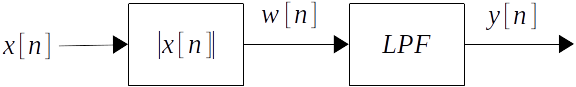

where $w[n] = |x[n]|$ and $y[n]$ was the output of a low-pass FIR filter (averaging filter). In this exercise, you will re-implement this low-pass filter as an IIR.

1.1 First, copy the functions envelope and synthesize from previous work and obtain the same synthesis. 



In [ ]:
# Write your code here

1.2 Let's take a look at the following system:

$$
H(z) = G\frac{1+z^{-1}}{1-rz^{-1}} \quad   0<r<1 \quad, G = \frac{1-r}{2}
$$

Note that the coefficients of the filter are the following:

$$
b_0 = 1, \quad b_1 = 1, \quad a_0 = 1, \quad a_1 = -r, \quad
$$

i. Find the zeros and poles of the system analytically.

[Double click to write your answer]

ii. Use the function `np.roots` to find the zeros and poles using Python. Compare the results with part i.

In [ ]:
# Write your code here

iii. Use the function  `plot_zeros_poles(z, p)` to plot the zeros and poles found in ii.

In [ ]:
from sis1lab.util import plot_zeros_poles

# Write your code here

1.3 Let's see the frequency response of this filter:



In [ ]:
ww = np.arange(-np.pi, np.pi, np.pi/500)
r = 0.9
G = (1 - r)/2
_, HH = signal.freqz([G, G], [1 , -r], ww)

plot_frequency_response(ww, HH)

1.4. Change the parameter $r$ in the range $(0, 1)$. What happens when $r$ is increased?

[Double click to write your answer]

1.5 What type of filter is (low-pass, band-pass, or high-pass filter)?


[Double click to write your answer]

1.6 Now we can use this IIR filter to extract the envelope. Let's define a new function `envelope_iir(x)` that applies the filter to the absolute value of the signal. Note that we are using signal.lfilter function to apply the filter.


In [ ]:
def envelope_iir(x, r=0.995):
  G = (1 - r)/2
  y = signal.lfilter([G, G], [1, -r], np.abs(x))
  return y

Extract the envelope of your reference signal using both the FIR and IIR filters and compare the results plot them along with the signal. Change the value of $r$ until you are comfortable with the result.

In [ ]:
# Write your code here

1.7 What are the main differences between the two filters? For instance, compare the number of coefficients.

[Double click to write your answer]

1.8 Apply the new envelope (extracted from the IIR filter) to the synthesis generated with the `synthesize` function and listen to the result.

In [ ]:
# Write your code here

---

**2. Band-pass filters**

Now let's work with the following system: 

$$
H(z) = \frac{(1-z^{-1})(1+z^{-1})}{(1-re^{j\omega_n}z^{-1})(1-re^{-j\omega_n}z^{-1})}, \quad 0<r<1
$$

Note that the poles are $p_1 = re^{j\omega_n}$ and $p_2 = re^{-j\omega_n}$; and the zeros are $z_1=1$ and $z_2=-1$. 

2.1 Use the function `plot_zeros_poles` to plot the zeros and poles of the system.

Note: use $w_n = \pi/4$ and $r=0.99$.

In [ ]:
# Write your code here

2.2 Show analytically that $a_k = [1, -2rcos(\omega_n), r^2]$ and $b_k=[1, 0, -1]$.

[Double click to write your answer]

2.3 Plot the frequency response of the filter. Confirm this is a band-pass filter. What's the central frequency of the passband?

In [ ]:
# Write your code here

[Double click to write your answer]


2.4 Define a function `bpf(x, f, r, fs)` that applies the above band-pass filter. 

Note 1: remember that a frequency can be converted to the normalized radian frequncy by: $\omega_n = 2\pi f_n/f_s$.

Note 2: use `signal.lfilter` function to implement the filter.

In [ ]:
def bpf(x, fn, fs, r=0.995):
  """Applies a band-pass filter with central frequency fn

  Parameters
  ----------
  x : np.array
      The input signal in the form of a numpy array
  fn: int or float
      Central frequency of the band pass in Hz 
  fs : int or float
      Frequency rate in Hz
  r: float
      Magnitude of the poles

  Returns
  -------
  y : np.array
      The output of the filter

  """
  # Write your code here

2.5 Regardless of the phase, until now we were synthesizing the instrument signal by summing $K$ harmonics of the signal with different weights ($A_k$) and multiplying the sum by the envelope of the reference signal ($e(t)$):

$$y(t) = e(t) \cdot \sum_{k=1}^K A_k\cos\left(2\pi kf_0 t \right), $$

where $f_0$ is the fundamental frequency of the note. Now we want to improve this synthesis by finding a time-dependent amplitude ($A_k(t)$) for each harmonic:

$$y(t) = \sum_{k=1}^K A_k(t) \cos\left(2\pi kf_0 t \right), $$

where $A_k(t)$ is the amplitude of the harmonic $k$. To extract the amplitudes $A_k(t)$ we'll apply a band-pass filter with central frequency $kf_0$ and calculate the envelope of the output by using the `envelope_iir`.


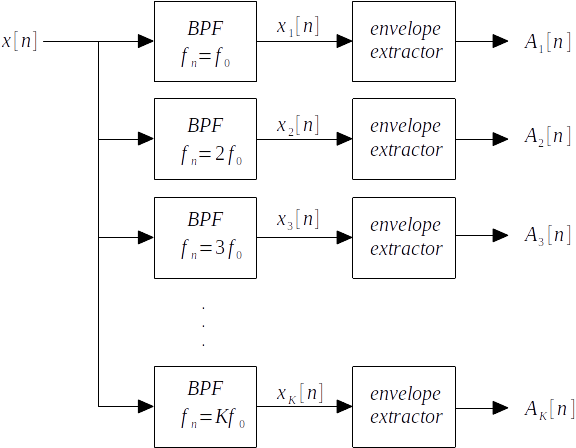

For instance, the following code should extract the envelope of the fundamental frequency component. Change the value of $f_0$ to coincide with your fundamental frequency and check the result. 

In [ ]:
f0 = # put your fundamental frequency here
x_1 = bpf(x, f0, fs)
A_1 = envelope_iir(x_1, r=0.999)
plot_signals([x_1, A_1], fs, t_start=0, t_end=1.5, name=['x_1(t)', 'A_1(t)'])

2.6 Complete the `synthetize_with_bpf` function to implement a synthesis applying different envelopes for each harmonic.


In [ ]:
def synthetize_with_bpf(x, f0, phi, K, fs):
  """Synthetizes an harmonic signal using different envelopes for each harmonic
  The envelops are extracted from the reference signal x.

  Parameters
  ----------
  x : np.array
      The reference signal in the form of a numpy array
  f0: int or float
      Fundamental frequency of the synthesis
  phi : float
      Phase
  K: int
      Number of harmonics
  fs : int or float
      Frequency rate in Hz

  Returns
  -------
  y : np.array
      The output of the filter

  """
  Ts = 1/float(fs)
  t = np.arange(0, len(x)*Ts, Ts)

  y = 0
  for k in range(1, int(K) + 1):
    x_k = # output of the BPF filter
    A_k = # output of the envelope extractor
    y += A_k * np.cos(2*np.pi*k*f0*t + k*phi - (k-1)*np.pi/2)

  y = np.amax(x)*y/np.amax(y) # normalize the output
  return y

2.6 Call the function `synthetize_with_bpf` to get the synthesized signal and **listen to it**.

Note that now you can increase the number of harmonics $K$ as you want because we are not manually measuring the weights of each harmonic.

In [ ]:
# Write your code here

2.7 Compare the **spectrograms** of the synthesized signal and reference signal.

In [ ]:
# Write your code here